## Ropes vs. Kirkland

### Check Kirkland Distribution

In [1]:
import pandas as pd
import json

ke = pd.read_csv ('../data/Kirkland & Ellis/chambers_reviews_kirkland_ellis.csv')
ke.head()[['name', 'departments/0/rankingDescription']]

,name,departments/0/rankingDescription
0,Damian Jacobs,Band 4
1,Damian Jacobs,Band 4
2,Noah Stewart-Ornstein,Associates to watch
3,Nicole Washington,Up and Coming
4,Aaron H Marks,Band 3


In [2]:
ke.columns

Index(['publicationTypeId', 'publicationTypeGroupId',
       'publicationTypeDescription', 'departments/0/isDepartmentRanked',
       'departments/0/description', 'departments/0/rankingDescription',
       'departments/0/parentOrganisationId', 'departments/0/organisationName',
       'departments/0/practiceAreaDescription',
       'departments/0/locationDescription', 'departments/0/practiceAreaId',
       'departments/0/subsectionTypeId', 'departments/0/locationId',
       'departments/0/organisationId',
       'departments/0/reviewContent/0/content/0',
       'departments/0/reviewContent/0/description', 'personOrganisationId',
       'name', 'image', 'departments/1/isDepartmentRanked',
       'departments/1/description', 'departments/1/rankingDescription',
       'departments/1/parentOrganisationId', 'departments/1/organisationName',
       'departments/1/practiceAreaDescription',
       'departments/1/locationDescription', 'departments/1/practiceAreaId',
       'departments/1/subsect

In [3]:
ke["departments/0/rankingDescription"].unique()

array(['Band 4', 'Associates to watch', 'Up and Coming', 'Band 3',
       'Band 5', 'Band 1', 'Band 2', 'Eminent Practitioners', 'Band 6',
       'Star Associates', 'Senior Statespeople', nan, 'Star Individuals',
       'Spotlight Table'], dtype=object)

In [4]:
ke[ke['departments/0/rankingDescription'].isna()][['name', 'departments/0/rankingDescription', 'departments/0/isDepartmentRanked']]

# I checked chambers and these people are all ranked. So I may have pulled data wrong
# I need to check my work and poke around before we deliver anything related to this

,name,departments/0/rankingDescription,departments/0/isDepartmentRanked
192,Leo Plank,NaN,NaN
199,Louis Rabinowitz,NaN,NaN
200,Louis Rabinowitz,NaN,NaN
224,Matthew Merkle,NaN,NaN
348,Srinivas Kaushik,NaN,NaN
349,Srinivas Kaushik,NaN,NaN
378,William R Burke,NaN,NaN


<AxesSubplot:title={'center':'Kirkland'}>

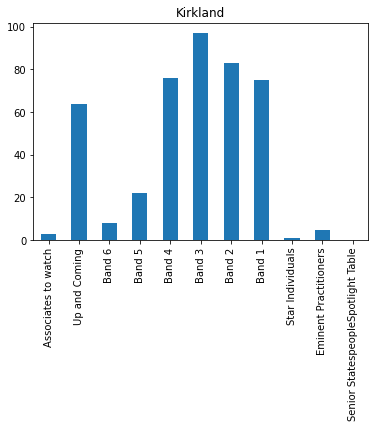

In [5]:
order = ['Associates to watch', 'Up and Coming', 'Band 6', 'Band 5', 'Band 4', 'Band 3', 'Band 2', 'Band 1', 'Star Individuals', 'Eminent Practitioners', 'Senior Statespeople' 'Spotlight Table']
# Not sure on this ordering -- need to double check
ke["departments/0/rankingDescription"].value_counts().reindex(order).plot(kind="bar", title="Kirkland")

In [6]:
ke['departments/0/organisationName'].unique()
# this is super weird, I probably need to do more data checks & data cleaning here

array(['Kirkland & Ellis', 'Kirkland & Ellis International LLP',
       'Kirkland & Ellis LLP', 'Goodwin', nan, 'Clement & Murphy, PLLC',
       'Sidley Austin LLP'], dtype=object)

In [7]:
ke_counts = ke["departments/0/rankingDescription"].value_counts(sort=False).rename_axis('Rank').reset_index(name='ke_counts')
total_lawyers_ke = 3025 # have Daniel check this -- this was just a quick Google
ke_counts["ke_percent"] = (ke_counts["ke_counts"] / total_lawyers_ke) * 100
ke_counts

,Rank,ke_counts,ke_percent
0,Band 4,76,2.512397
1,Associates to watch,3,0.099174
2,Up and Coming,64,2.115702
3,Band 3,97,3.206612
4,Band 5,22,0.727273
5,Band 1,75,2.479339
6,Band 2,83,2.743802
7,Eminent Practitioners,5,0.165289
8,Band 6,8,0.264463
9,Star Associates,1,0.033058


### Compare Kirkland vs. Ropes

In [8]:
rg = pd.read_csv('../data/Ropes & Gray/chambers_reviews_ropesandgray.csv')
rg_counts = rg["departments/0/rankingDescription"].value_counts(sort=False).rename_axis('Rank').reset_index(name='rg_counts')
total_partners_rg = 317 # verified by Daniel # can verify via the firm's website
total_lawyers_rg = 1372 # have Daniel check this -- this was just a quick Google
rg_counts["rg_percent"] = (rg_counts["rg_counts"] / total_lawyers_rg) * 100
rg_counts

,Rank,rg_counts,rg_percent
0,Up and Coming,21,1.530612
1,Band 3,42,3.061224
2,Band 4,46,3.352770
3,Band 2,55,4.008746
4,Band 5,17,1.239067
5,Band 1,31,2.259475
6,Eminent Practitioners,3,0.218659
7,Spotlight Table,2,0.145773
8,Star Individuals,1,0.072886
9,Band 6,1,0.072886


<AxesSubplot:xlabel='Rank'>

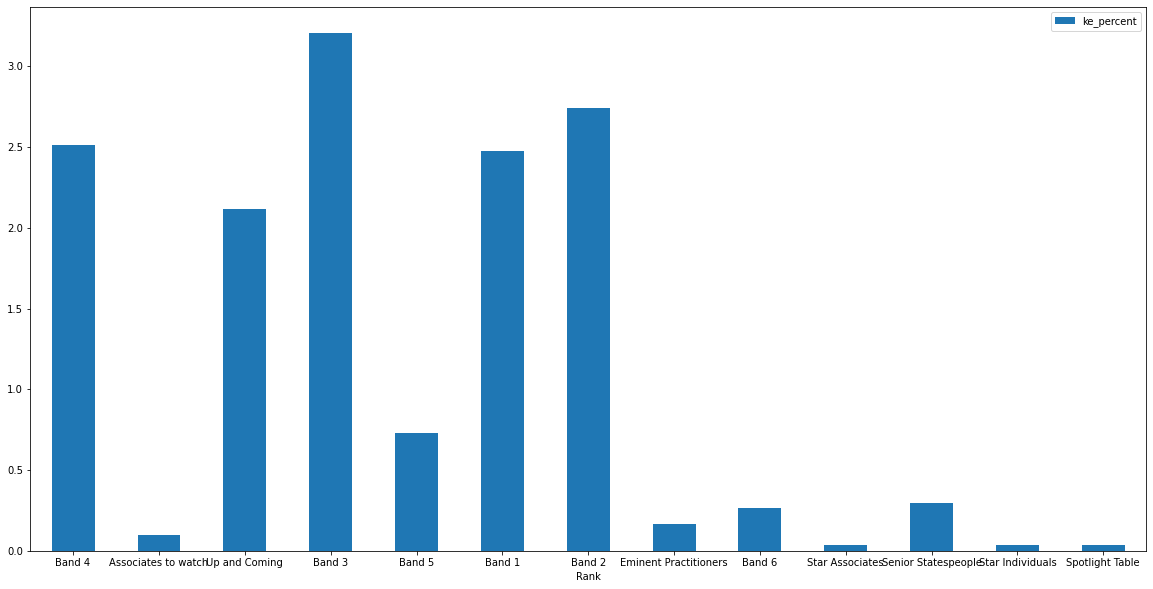

In [9]:
ke_counts.plot.bar(x='Rank', y='ke_percent', rot=0, figsize=(20, 10))

In [24]:
combined = rg_counts.merge(ke_counts, on=['Rank', 'Rank'])
combined = combined.set_index('Rank')
combined = combined.reindex(order)
combined

,rg_counts,rg_percent,ke_counts,ke_percent
Rank,,,,
Associates to watch,NaN,NaN,NaN,NaN
Up and Coming,21.0,1.530612,64.0,2.115702
Band 6,1.0,0.072886,8.0,0.264463
Band 5,17.0,1.239067,22.0,0.727273
Band 4,46.0,3.352770,76.0,2.512397
Band 3,42.0,3.061224,97.0,3.206612
Band 2,55.0,4.008746,83.0,2.743802
Band 1,31.0,2.259475,75.0,2.479339
Star Individuals,1.0,0.072886,1.0,0.033058


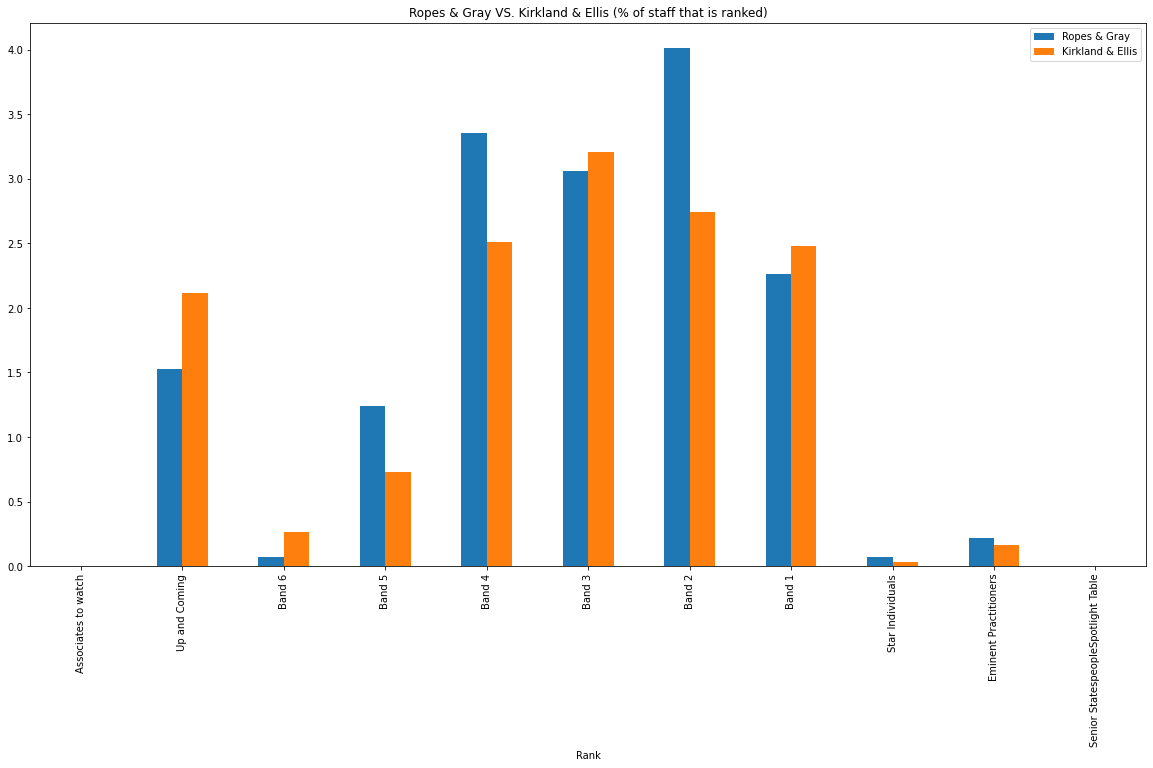

In [28]:
plot = combined.plot.bar(y=['rg_percent', 'ke_percent'], figsize=(20, 10), title="Ropes & Gray VS. Kirkland & Ellis (% of staff that is ranked)")
plot.legend(['Ropes & Gray', 'Kirkland & Ellis'])
